*Algoritmo Boosting* no Google Colab

In [ ]:
# Importar as bibliotecas necessárias
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Criar um conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo AdaBoost
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Fazer previsões com o AdaBoost
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Treinar o modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões com o Gradient Boosting
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Exibir as precisões
print(f"Precisão do modelo AdaBoost: {accuracy_ada:.2f}")
print(f"Precisão do modelo Gradient Boosting: {accuracy_gb:.2f}")


Precisão do modelo AdaBoost: 0.90
Precisão do modelo Gradient Boosting: 0.91


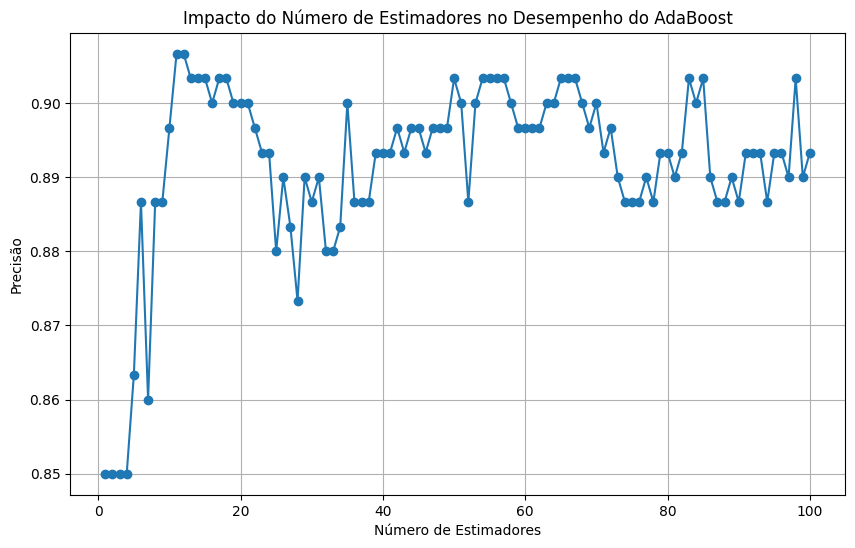

In [ ]:
# Avaliar o impacto do número de estimadores no desempenho do AdaBoost
estimators_range = range(1, 101)
accuracies = []

for n in estimators_range:
    ada_model = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracies, marker='o')
plt.title('Impacto do Número de Estimadores no Desempenho do AdaBoost')
plt.xlabel('Número de Estimadores')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()


Otimização do Algoritmo Boosting

In [ ]:
# Importar bibliotecas necessárias
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
# Gerar dados sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Definir modelo base
base_model = DecisionTreeClassifier(max_depth=1)

# Criar o classificador AdaBoost
ada = AdaBoostClassifier(base_estimator=base_model, random_state=42)

# Definir os parâmetros para otimizar
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Realizar a busca pelos melhores parâmetros
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros
print(f"Melhores parâmetros: {grid_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Melhores parâmetros: {'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
# Treinar o modelo com os melhores parâmetros
best_ada = grid_search.best_estimator_
best_ada.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_ada.predict(X_test)

# Avaliar a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão do AdaBoost otimizado: {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisão do AdaBoost otimizado: 0.89
